# Burgers Equation Solver
Equation:   $u_{t} + uu_{x}-\nu u_{xx} = 0$  
Boundary Conditions:  
$x \in [-1,1]$  $t \in [0,1]$  
$u(0,x)= g(x)$  
$u(t,-1)=u(t,1)=0$ 

In [ ]:
#Sumanth Nethi

import numpy as np
import matplotlib.pyplot as plt

## Input Parameters

In [ ]:
nu = 0.01/np.pi       #Viscosity

xmax = 2              # x values range from 0 to xmax
tmax = 1              # t values range from 0 to xmax

nx = 200              # Number of x points
dt = 0.001            # Time step

x = np.linspace(0, xmax, nx)  
nt = int(tmax / dt)  
dx = xmax / nx  
t = np.linspace(0, tmax, nt)  
u = np.zeros([nx, nt])                                 # Initializing velocity array to zero 
u[:, 0] = -np.sin(np.pi*x)                             # Initial condition g(x)
u[0, :] = 0                                            # Boundary condition at x=0
u[nx-1, :] = 0                                         # Boundary condition at x=xmax

## Finite Difference Method

In [ ]:
# Time Stepping
for n in range(nt-1):
    u[1:nx-1, n+1] = (u[1:nx-1, n] + dt * (nu * (u[2:nx, n] - 2 * u[1:nx-1, n] + u[0:nx-2, n]) / dx**2 + 0.25 * (u[2:nx, n]**2 - u[0:nx-2, n]**2) / dx))


In [ ]:
for n in range(nt-1):
    # Lax
     u[1:nx-1, n+1] = (0.5 * (u[0:nx-2, n] + u[2:nx, n]) - 
                       0.25 * dt * (u[2:nx, n]**2 - u[0:nx-2, n]**2) / dx)
    # Upwind conservative
#     u[1:nx-1, n+1] = (u[1:nx-1, n] - 
#                       0.5 * dt * (u[1:nx-1, n]**2 - u[0:nx-2, n]**2) / dx)
    # Non conservative
#    u[1:nx-1, n+1] = (u[1:nx-1, n] - 
#                      dt * u[1:nx-1, n] * (u[1:nx-1, n] - u[0:nx-2, n]) / dx)

## Plots

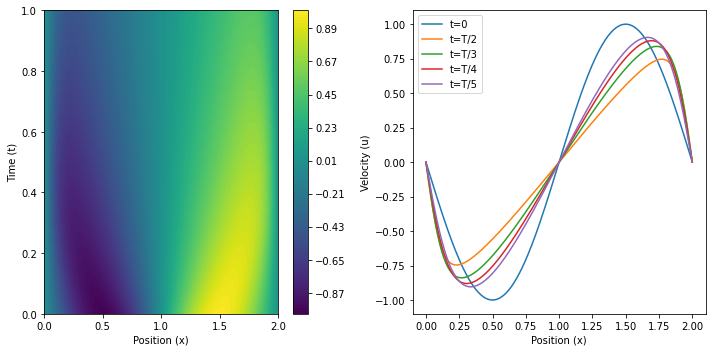

In [ ]:
timepoints = np.array([0, tmax / 2, tmax / 3, tmax / 4, tmax/5]) / dt
lvls = np.arange(np.amin(u)-0.01, np.amax(u) + 0.01,  np.amax(u) / 50)
fig1, ax1 = plt.subplots(1, 2, figsize=(10, 5))
cf = ax1[0].contourf(x, t, u.T, levels=lvls)
cbar = fig1.colorbar(cf, ax=ax1[0])
ax1[0].set_xlabel('Position (x)')
ax1[0].set_ylabel('Time (t)')
ax1[1].plot(x, u[:, int(timepoints[0])], label='t=0')
ax1[1].plot(x, u[:, int(timepoints[1])], label='t=T/2')
ax1[1].plot(x, u[:, int(timepoints[2])], label='t=T/3')
ax1[1].plot(x, u[:, int(timepoints[3])], label='t=T/4')
ax1[1].plot(x, u[:, int(timepoints[4])], label='t=T/5')
ax1[1].set_xlabel('Position (x)')
ax1[1].set_ylabel('Velocity (u)')
ax1[1].legend()
fig1.tight_layout()
plt.show()